In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the data
cases_df = pd.read_csv('data/data_cases.csv')
labels_df = pd.read_csv('data/data_label.csv')

In [3]:
cases_df.head()

,case_id,body_parts_head_or_neck,body_parts_arm,body_parts_palm,body_parts_back_of_hand,body_parts_torso_front,body_parts_torso_back,body_parts_genitalia_or_groin,body_parts_buttocks,body_parts_leg,body_parts_foot_top_or_side,body_parts_foot_sole,body_parts_other,image_1_path,image_2_path,image_3_path,image_1_shot_type,image_2_shot_type,image_3_shot_type,combined_race
0,-1.000000e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NaN,NaN,dataset/images/-3205742176803893704.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN
1,-1.000000e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/images/-4762289084741430925.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN
2,-1.000000e+18,NaN,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/images/-4027806997035329030.png,NaN,NaN,CLOSE_UP,NaN,NaN,HISPANIC_LATINO_OR_SPANISH_ORIGIN
3,-1.000000e+18,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dataset/images/-5332065579713135540.png,dataset/images/-6353431708064969797.png,dataset/images/742075435141960831.png,AT_DISTANCE,AT_AN_ANGLE,CLOSE_UP,NaN
4,-1.000000e+18,YES,YES,NaN,YES,YES,YES,YES,YES,YES,YES,NaN,NaN,dataset/images/-3799298995660217860.png,dataset/images/-5881426422999442186.png,dataset/images/5854025080806696361.png,AT_AN_ANGLE,AT_DISTANCE,CLOSE_UP,WHITE


In [4]:
print('Columns: /n', cases_df.columns)

Columns: /n Index(['case_id', 'body_parts_head_or_neck', 'body_parts_arm',
       'body_parts_palm', 'body_parts_back_of_hand', 'body_parts_torso_front',
       'body_parts_torso_back', 'body_parts_genitalia_or_groin',
       'body_parts_buttocks', 'body_parts_leg', 'body_parts_foot_top_or_side',
       'body_parts_foot_sole', 'body_parts_other', 'image_1_path',
       'image_2_path', 'image_3_path', 'image_1_shot_type',
       'image_2_shot_type', 'image_3_shot_type', 'combined_race'],
      dtype='object')


In [5]:
labels_df.head()

,case_id,dermatologist_gradable_for_skin_condition_1,dermatologist_gradable_for_skin_condition_2,dermatologist_gradable_for_skin_condition_3,dermatologist_skin_condition_on_label_name,dermatologist_skin_condition_confidence,weighted_skin_condition_label,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,gradable_for_monk_skin_tone_india,gradable_for_monk_skin_tone_us,monk_skin_tone_label_india,monk_skin_tone_label_us
0,-1.000600e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Inflicted skin lesions', 'Eczema', 'Irritant...","[4, 4, 3]","{'Inflicted skin lesions': 0.41, 'Eczema': 0.4...",YES,NaN,NaN,FST2,NaN,NaN,True,True,2.0,1.0
1,-1.002040e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Prurigo nodularis', 'Actinic Keratosis', 'SC...","[4, 3, 4]","{'Prurigo nodularis': 0.41, 'SCC/SCCIS': 0.41,...",YES,NaN,NaN,FST1,NaN,NaN,True,True,3.0,3.0
2,-1.003360e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Impetigo', 'Herpes Zoster', 'Bullous dermati...","[2, 1, 1]","{'Impetigo': 0.55, 'Herpes Zoster': 0.23, 'Bul...",YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,4.0
3,-1.003830e+18,NO_IMAGE_QUALITY_INSUFFICIENT,NaN,NaN,[],[],{},NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,4.0
4,-1.003840e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Lichen planus/lichenoid eruption', 'Follicul...","[1, 1, 1]","{'Lichen planus/lichenoid eruption': 0.33, 'Fo...",YES,NaN,NaN,FST1,NaN,NaN,True,True,1.0,1.0


In [6]:
labels_df.columns

Index(['case_id', 'dermatologist_gradable_for_skin_condition_1',
       'dermatologist_gradable_for_skin_condition_2',
       'dermatologist_gradable_for_skin_condition_3',
       'dermatologist_skin_condition_on_label_name',
       'dermatologist_skin_condition_confidence',
       'weighted_skin_condition_label',
       'dermatologist_gradable_for_fitzpatrick_skin_type_1',
       'dermatologist_gradable_for_fitzpatrick_skin_type_2',
       'dermatologist_gradable_for_fitzpatrick_skin_type_3',
       'dermatologist_fitzpatrick_skin_type_label_1',
       'dermatologist_fitzpatrick_skin_type_label_2',
       'dermatologist_fitzpatrick_skin_type_label_3',
       'gradable_for_monk_skin_tone_india', 'gradable_for_monk_skin_tone_us',
       'monk_skin_tone_label_india', 'monk_skin_tone_label_us'],
      dtype='object')

In [7]:
### Starting with the cases_df

In [8]:
# List of body part columns
body_parts = [
    'body_parts_head_or_neck', 'body_parts_arm', 'body_parts_palm',
    'body_parts_back_of_hand', 'body_parts_torso_front', 'body_parts_torso_back',
    'body_parts_genitalia_or_groin', 'body_parts_buttocks', 'body_parts_leg',
    'body_parts_foot_top_or_side', 'body_parts_foot_sole', 'body_parts_other'
]

# Function to get all body parts with 'YES' flag
def get_body_parts(row):
    yes_parts = [part.replace('body_parts_', '') for part in body_parts if row[part] == 'YES']
    return ', '.join(yes_parts) if yes_parts else None

# Apply the function to create new 'body_part' column
cases_df['body_part'] = cases_df.apply(get_body_parts, axis=1)

# Drop the original body part columns
cases_df = cases_df.drop(columns=body_parts)

# Reorder columns
columns_order = ['case_id', 'body_part', 'image_1_path', 'image_2_path', 'image_3_path',
                 'image_1_shot_type', 'image_2_shot_type', 'image_3_shot_type', 'combined_race']
cases_df = cases_df[columns_order]

# Save the restructured CSV
cases_df.to_csv('data/cases_cleaned.csv', index=False)

In [9]:
cases_df = pd.read_csv('data/cases_cleaned.csv')

In [10]:
cases_df.head()

,case_id,body_part,image_1_path,image_2_path,image_3_path,image_1_shot_type,image_2_shot_type,image_3_shot_type,combined_race
0,-1.000000e+18,foot_top_or_side,dataset/images/-3205742176803893704.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN
1,-1.000000e+18,NaN,dataset/images/-4762289084741430925.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN
2,-1.000000e+18,arm,dataset/images/-4027806997035329030.png,NaN,NaN,CLOSE_UP,NaN,NaN,HISPANIC_LATINO_OR_SPANISH_ORIGIN
3,-1.000000e+18,palm,dataset/images/-5332065579713135540.png,dataset/images/-6353431708064969797.png,dataset/images/742075435141960831.png,AT_DISTANCE,AT_AN_ANGLE,CLOSE_UP,NaN
4,-1.000000e+18,"head_or_neck, arm, back_of_hand, torso_front, ...",dataset/images/-3799298995660217860.png,dataset/images/-5881426422999442186.png,dataset/images/5854025080806696361.png,AT_AN_ANGLE,AT_DISTANCE,CLOSE_UP,WHITE


In [11]:
cases_df['body_part'].unique()

array(['foot_top_or_side', nan, 'arm', 'palm',
       'head_or_neck, arm, back_of_hand, torso_front, torso_back, genitalia_or_groin, buttocks, leg, foot_top_or_side',
       'head_or_neck, arm, palm, back_of_hand, torso_back, genitalia_or_groin',
       'head_or_neck, arm, palm', 'torso_back', 'arm, torso_front',
       'other', 'leg', 'torso_front, torso_back',
       'torso_front, torso_back, other', 'back_of_hand',
       'head_or_neck, torso_front', 'torso_front', 'head_or_neck',
       'arm, back_of_hand, torso_front, torso_back, buttocks, leg, foot_top_or_side',
       'arm, palm, leg, foot_sole', 'arm, leg',
       'arm, torso_back, buttocks, leg',
       'head_or_neck, torso_front, torso_back',
       'head_or_neck, leg, foot_top_or_side',
       'head_or_neck, arm, torso_front, torso_back, buttocks, leg',
       'head_or_neck, arm, back_of_hand, torso_front, torso_back, genitalia_or_groin, buttocks, leg, foot_top_or_side, foot_sole, other',
       'torso_back, other', 'arm, ba

In [12]:
cases_df['body_part'].value_counts()

body_part
leg                                                                    760
arm                                                                    669
other                                                                  273
head_or_neck                                                           228
torso_front                                                            140
                                                                      ... 
head_or_neck, arm, genitalia_or_groin, buttocks                          1
palm, foot_top_or_side                                                   1
arm, back_of_hand, torso_front, torso_back, genitalia_or_groin, leg      1
head_or_neck, arm, back_of_hand, torso_front, torso_back, other          1
head_or_neck, arm, foot_sole                                             1
Name: count, Length: 390, dtype: int64

In [13]:
cases_df.body_part.unique()

array(['foot_top_or_side', nan, 'arm', 'palm',
       'head_or_neck, arm, back_of_hand, torso_front, torso_back, genitalia_or_groin, buttocks, leg, foot_top_or_side',
       'head_or_neck, arm, palm, back_of_hand, torso_back, genitalia_or_groin',
       'head_or_neck, arm, palm', 'torso_back', 'arm, torso_front',
       'other', 'leg', 'torso_front, torso_back',
       'torso_front, torso_back, other', 'back_of_hand',
       'head_or_neck, torso_front', 'torso_front', 'head_or_neck',
       'arm, back_of_hand, torso_front, torso_back, buttocks, leg, foot_top_or_side',
       'arm, palm, leg, foot_sole', 'arm, leg',
       'arm, torso_back, buttocks, leg',
       'head_or_neck, torso_front, torso_back',
       'head_or_neck, leg, foot_top_or_side',
       'head_or_neck, arm, torso_front, torso_back, buttocks, leg',
       'head_or_neck, arm, back_of_hand, torso_front, torso_back, genitalia_or_groin, buttocks, leg, foot_top_or_side, foot_sole, other',
       'torso_back, other', 'arm, ba

In [14]:
labels_df.head()

,case_id,dermatologist_gradable_for_skin_condition_1,dermatologist_gradable_for_skin_condition_2,dermatologist_gradable_for_skin_condition_3,dermatologist_skin_condition_on_label_name,dermatologist_skin_condition_confidence,weighted_skin_condition_label,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,gradable_for_monk_skin_tone_india,gradable_for_monk_skin_tone_us,monk_skin_tone_label_india,monk_skin_tone_label_us
0,-1.000600e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Inflicted skin lesions', 'Eczema', 'Irritant...","[4, 4, 3]","{'Inflicted skin lesions': 0.41, 'Eczema': 0.4...",YES,NaN,NaN,FST2,NaN,NaN,True,True,2.0,1.0
1,-1.002040e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Prurigo nodularis', 'Actinic Keratosis', 'SC...","[4, 3, 4]","{'Prurigo nodularis': 0.41, 'SCC/SCCIS': 0.41,...",YES,NaN,NaN,FST1,NaN,NaN,True,True,3.0,3.0
2,-1.003360e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Impetigo', 'Herpes Zoster', 'Bullous dermati...","[2, 1, 1]","{'Impetigo': 0.55, 'Herpes Zoster': 0.23, 'Bul...",YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,4.0
3,-1.003830e+18,NO_IMAGE_QUALITY_INSUFFICIENT,NaN,NaN,[],[],{},NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,4.0
4,-1.003840e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Lichen planus/lichenoid eruption', 'Follicul...","[1, 1, 1]","{'Lichen planus/lichenoid eruption': 0.33, 'Fo...",YES,NaN,NaN,FST1,NaN,NaN,True,True,1.0,1.0


In [17]:
# Drop the rows with gradable_skin_condition = 'NO_IMAGE_QUALITY_INSUFFICIENT'
labels_df = labels_df[labels_df['dermatologist_gradable_for_skin_condition_1'] != 'NO_IMAGE_QUALITY_INSUFFICIENT']

In [19]:
import ast
import pandas as pd
import numpy as np

def process_weighted_label(label_str):
    try:
        if pd.isna(label_str) or label_str == '{}':
            return pd.Series([np.nan] * 6)

        label_dict = ast.literal_eval(label_str)
        sorted_items = sorted(label_dict.items(), key=lambda x: x[1], reverse=True)

        # Pad the list with (np.nan, np.nan) if there are fewer than 3 items
        sorted_items = sorted_items + [(np.nan, np.nan)] * (3 - len(sorted_items))

        return pd.Series([item for pair in sorted_items[:3] for item in pair])
    except:
        return pd.Series([np.nan] * 6)

# Apply the function to create new columns
new_columns = labels_df['weighted_skin_condition_label'].apply(process_weighted_label)
new_columns.columns = ['condition_1', 'confidence_1', 'condition_2', 'confidence_2', 'condition_3', 'confidence_3']

# Add the new columns to the DataFrame
labels_df = pd.concat([labels_df, new_columns], axis=1)

# Process Fitzpatrick skin type labels
def fst_to_num(fst):
    if pd.isna(fst):
        return np.nan
    try:
        return int(fst.replace('FST', ''))
    except:
        return np.nan

def avg_skin_type_to_category(avg):
    if pd.isna(avg):
        return np.nan
    elif 1 <= avg < 3:
        return 'white'
    elif 3 <= avg < 4:
        return 'fair'
    elif 4 <= avg < 6:
        return 'brown'
    elif avg == 6:
        return 'black'
    else:
        return np.nan

# Convert FST labels to numbers
for i in range(1, 4):
    col = f'dermatologist_fitzpatrick_skin_type_label_{i}'
    labels_df[f'{col}_num'] = labels_df[col].apply(fst_to_num)

# Calculate average skin type
labels_df['avg_skin_type'] = labels_df[[f'dermatologist_fitzpatrick_skin_type_label_{i}_num' for i in range(1, 4)]].mean(axis=1)

# Convert average to category
labels_df['skin_type_category'] = labels_df['avg_skin_type'].apply(avg_skin_type_to_category)

# Drop original columns if no longer needed
columns_to_drop = ['weighted_skin_condition_label', 'dermatologist_fitzpatrick_skin_type_label_1',
                   'dermatologist_fitzpatrick_skin_type_label_2', 'dermatologist_fitzpatrick_skin_type_label_3']
labels_df = labels_df.drop(columns=columns_to_drop)

In [20]:
labels_df.head()

,case_id,dermatologist_gradable_for_skin_condition_1,dermatologist_gradable_for_skin_condition_2,dermatologist_gradable_for_skin_condition_3,dermatologist_skin_condition_on_label_name,dermatologist_skin_condition_confidence,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,gradable_for_monk_skin_tone_india,...,confidence_1,condition_2,confidence_2,condition_3,confidence_3,dermatologist_fitzpatrick_skin_type_label_1_num,dermatologist_fitzpatrick_skin_type_label_2_num,dermatologist_fitzpatrick_skin_type_label_3_num,avg_skin_type,skin_type_category
0,-1.000600e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Inflicted skin lesions', 'Eczema', 'Irritant...","[4, 4, 3]",YES,NaN,NaN,True,...,0.41,Eczema,0.41,Irritant Contact Dermatitis,0.18,2.0,NaN,NaN,2.0,white
1,-1.002040e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Prurigo nodularis', 'Actinic Keratosis', 'SC...","[4, 3, 4]",YES,NaN,NaN,True,...,0.41,SCC/SCCIS,0.41,Actinic Keratosis,0.18,1.0,NaN,NaN,1.0,white
2,-1.003360e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Impetigo', 'Herpes Zoster', 'Bullous dermati...","[2, 1, 1]",YES,NaN,NaN,True,...,0.55,Herpes Zoster,0.23,Bullous dermatitis,0.23,4.0,NaN,NaN,4.0,brown
4,-1.003840e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Lichen planus/lichenoid eruption', 'Follicul...","[1, 1, 1]",YES,NaN,NaN,True,...,0.33,Folliculitis,0.33,Dermatosis due to flea,0.33,1.0,NaN,NaN,1.0,white
5,-1.005080e+18,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Drug Rash', 'Viral Exanthem', 'Eczema']","[2, 2, 1]",YES,NaN,NaN,True,...,0.41,Viral Exanthem,0.41,Eczema,0.18,3.0,NaN,NaN,3.0,fair


In [21]:
labels_df.to_csv('data/labels_cleaned.csv', index=False)

In [22]:
labels_df.columns

Index(['case_id', 'dermatologist_gradable_for_skin_condition_1',
       'dermatologist_gradable_for_skin_condition_2',
       'dermatologist_gradable_for_skin_condition_3',
       'dermatologist_skin_condition_on_label_name',
       'dermatologist_skin_condition_confidence',
       'dermatologist_gradable_for_fitzpatrick_skin_type_1',
       'dermatologist_gradable_for_fitzpatrick_skin_type_2',
       'dermatologist_gradable_for_fitzpatrick_skin_type_3',
       'gradable_for_monk_skin_tone_india', 'gradable_for_monk_skin_tone_us',
       'monk_skin_tone_label_india', 'monk_skin_tone_label_us', 'condition_1',
       'confidence_1', 'condition_2', 'confidence_2', 'condition_3',
       'confidence_3', 'dermatologist_fitzpatrick_skin_type_label_1_num',
       'dermatologist_fitzpatrick_skin_type_label_2_num',
       'dermatologist_fitzpatrick_skin_type_label_3_num', 'avg_skin_type',
       'skin_type_category'],
      dtype='object')

In [24]:
labels_df = labels_df.drop(columns=['dermatologist_gradable_for_skin_condition_1', 'dermatologist_gradable_for_skin_condition_2', 'dermatologist_gradable_for_skin_condition_3', 'dermatologist_skin_condition_on_label_name', 'dermatologist_skin_condition_confidence', 'dermatologist_gradable_for_fitzpatrick_skin_type_1', 'dermatologist_gradable_for_fitzpatrick_skin_type_2', 'dermatologist_gradable_for_fitzpatrick_skin_type_3','gradable_for_monk_skin_tone_india', 'gradable_for_monk_skin_tone_us', 'monk_skin_tone_label_india', 'monk_skin_tone_label_us', 'dermatologist_fitzpatrick_skin_type_label_1_num', 'dermatologist_fitzpatrick_skin_type_label_2_num', 'dermatologist_fitzpatrick_skin_type_label_3_num'])

In [25]:
labels_df.to_csv('data/labels_cleaned.csv', index=False)

In [26]:
clean_label_df = pd.read_csv('data/labels_cleaned.csv')

In [27]:
def clean_conditions(row):
    if row['confidence_2'] != row['confidence_1'] and row['confidence_2'] < row['confidence_1']:
        row['condition_2'] = np.nan
        row['confidence_2'] = np.nan

    if row['confidence_3'] != row['confidence_1'] and row['confidence_3'] < row['confidence_1']:
        row['condition_3'] = np.nan
        row['confidence_3'] = np.nan

    return row

# Apply the function to each row
clean_label_df = clean_label_df.apply(clean_conditions, axis=1)

# Remove rows where all conditions are NaN
clean_label_df = clean_label_df.dropna(subset=['condition_1', 'condition_2', 'condition_3'], how='all')

In [28]:
clean_label_df

,case_id,condition_1,confidence_1,condition_2,confidence_2,condition_3,confidence_3,avg_skin_type,skin_type_category
0,-1.000000e+18,Inflicted skin lesions,0.41,Eczema,0.41,NaN,NaN,2.000000,white
1,-1.000000e+18,Prurigo nodularis,0.41,SCC/SCCIS,0.41,NaN,NaN,1.000000,white
2,-1.000000e+18,Impetigo,0.55,NaN,NaN,NaN,NaN,4.000000,brown
3,-1.000000e+18,Lichen planus/lichenoid eruption,0.33,Folliculitis,0.33,Dermatosis due to flea,0.33,1.000000,white
4,-1.010000e+18,Drug Rash,0.41,Viral Exanthem,0.41,NaN,NaN,3.000000,fair
...,...,...,...,...,...,...,...,...,...
3103,9.670000e+17,Acne,0.33,Molluscum Contagiosum,0.33,Herpes Simplex,0.33,2.000000,white
3104,9.740000e+17,Allergic Contact Dermatitis,0.67,NaN,NaN,NaN,NaN,2.333333,white
3105,9.830000e+17,Impetigo,0.50,Foreign body,0.50,NaN,NaN,5.000000,brown
3106,9.960000e+17,Erythema gyratum repens,0.33,Seborrheic Dermatitis,0.33,Erythema marginatum in acute rheumatic fever,0.33,4.000000,brown


In [29]:
clean_label_df.condition_1.unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [31]:
condition_summary = pd.DataFrame({
    'count': clean_label_df['condition_1'].value_counts(),
    'percentage': clean_label_df['condition_1'].value_counts(normalize=True) * 100
})

# Round the percentage to two decimal places
condition_summary['percentage'] = condition_summary['percentage'].round(2)

# Sort by count in descending order
condition_summary = condition_summary.sort_values('count', ascending=False)

print(condition_summary.head(10))

                             count  percentage
condition_1                                   
Eczema                         479       15.94
Allergic Contact Dermatitis    266        8.85
Urticaria                      208        6.92
Insect Bite                    183        6.09
Folliculitis                   140        4.66
Psoriasis                      107        3.56
Tinea                           92        3.06
Impetigo                        68        2.26
Herpes Zoster                   67        2.23
Pigmented purpuric eruption     61        2.03


In [32]:
condition_summary = pd.DataFrame({
    'count': clean_label_df['condition_2'].value_counts(),
    'percentage': clean_label_df['condition_2'].value_counts(normalize=True) * 100
})

# Round the percentage to two decimal places
condition_summary['percentage'] = condition_summary['percentage'].round(2)

# Sort by count in descending order
condition_summary = condition_summary.sort_values('count', ascending=False)

print(condition_summary.head(10))

                             count  percentage
condition_2                                   
Allergic Contact Dermatitis    163       17.91
Eczema                         118       12.97
Insect Bite                     63        6.92
Irritant Contact Dermatitis     45        4.95
Psoriasis                       31        3.41
Folliculitis                    25        2.75
Herpes Simplex                  20        2.20
Leukocytoclastic Vasculitis     17        1.87
Stasis Dermatitis               16        1.76
Herpes Zoster                   16        1.76


In [33]:
condition_summary = pd.DataFrame({
    'count': clean_label_df['condition_3'].value_counts(),
    'percentage': clean_label_df['condition_3'].value_counts(normalize=True) * 100
})

# Round the percentage to two decimal places
condition_summary['percentage'] = condition_summary['percentage'].round(2)

# Sort by count in descending order
condition_summary = condition_summary.sort_values('count', ascending=False)

print(condition_summary.head(10))

                             count  percentage
condition_3                                   
Allergic Contact Dermatitis     86       22.75
Eczema                          42       11.11
Irritant Contact Dermatitis     31        8.20
Herpes Simplex                  21        5.56
Leukocytoclastic Vasculitis     16        4.23
Hypersensitivity                16        4.23
Insect Bite                     15        3.97
Lichen Simplex Chronicus         9        2.38
Psoriasis                        8        2.12
Seborrheic Dermatitis            6        1.59


In [36]:
# Create a boolean mask where no two confidence values are equal
mask = ~(
        (clean_label_df['confidence_1'] == clean_label_df['confidence_2']) |
        (clean_label_df['confidence_1'] == clean_label_df['confidence_3']) |
        (clean_label_df['confidence_2'] == clean_label_df['confidence_3'])
)

# Apply the mask to keep only rows where no two confidences are equal
clean_label_df = clean_label_df[mask]

# Reset the index
clean_label_df = clean_label_df.reset_index(drop=True)

In [38]:
clean_label_df.drop(columns=['condition_2', 'condition_3','confidence_2', 'confidence_3'])

,case_id,condition_1,confidence_1,avg_skin_type,skin_type_category
0,-1.000000e+18,Impetigo,0.55,4.000000,brown
1,-1.010000e+18,Basal Cell Carcinoma,0.55,3.000000,fair
2,-1.020000e+17,Eczema,0.67,3.666667,fair
3,-1.020000e+18,Purpura,1.00,4.000000,brown
4,-1.030000e+18,Eczema,0.55,2.000000,white
...,...,...,...,...,...
2090,9.350000e+17,Psoriasis,1.00,3.000000,fair
2091,9.520000e+16,Eczema,0.68,2.000000,white
2092,9.640000e+17,Insect Bite,0.55,2.000000,white
2093,9.740000e+17,Allergic Contact Dermatitis,0.67,2.333333,white


In [39]:
condition_summary = pd.DataFrame({
    'count': clean_label_df['condition_1'].value_counts(),
    'percentage': clean_label_df['condition_1'].value_counts(normalize=True) * 100
})

# Round the percentage to two decimal places
condition_summary['percentage'] = condition_summary['percentage'].round(2)

# Sort by count in descending order
condition_summary = condition_summary.sort_values('count', ascending=False)

print(condition_summary.head(10))

                             count  percentage
condition_1                                   
Eczema                         360       17.18
Allergic Contact Dermatitis    220       10.50
Urticaria                      170        8.11
Insect Bite                    133        6.35
Folliculitis                    91        4.34
Psoriasis                       65        3.10
Tinea                           60        2.86
Herpes Simplex                  54        2.58
Herpes Zoster                   45        2.15
Acne                            45        2.15


In [41]:
clean_label_df_filtered = clean_label_df[clean_label_df['confidence_1'] > 0.5]

In [42]:
condition_summary = pd.DataFrame({
    'count': clean_label_df_filtered['condition_1'].value_counts(),
    'percentage': clean_label_df_filtered['condition_1'].value_counts(normalize=True) * 100
})

# Round the percentage to two decimal places
condition_summary['percentage'] = condition_summary['percentage'].round(2)

# Sort by count in descending order
condition_summary = condition_summary.sort_values('count', ascending=False)

print(condition_summary.head(10))

                             count  percentage
condition_1                                   
Eczema                         312       16.67
Allergic Contact Dermatitis    192       10.26
Urticaria                      160        8.55
Insect Bite                    119        6.36
Folliculitis                    84        4.49
Psoriasis                       55        2.94
Tinea                           55        2.94
Herpes Simplex                  51        2.72
Herpes Zoster                   45        2.40
Acne                            42        2.24


In [43]:
clean_label_df_filtered.to_csv('data/labels_cleaned_filtered.csv', index=False)

In [45]:
unique_conditions = clean_label_df_filtered['condition_1'].unique()
unique_conditions

array(['Impetigo', 'Basal Cell Carcinoma', 'Eczema', 'Purpura',
       'Urticaria', 'Tinea Versicolor', 'Hyperpigmentation',
       'Infected eczema', 'Pityriasis rosea', 'Onychodystrophy',
       'Inflicted skin lesions', 'Chronic dermatitis, NOS', 'Tinea',
       'Psoriasis', 'Herpes Simplex', 'Pigmented purpuric eruption',
       'Granuloma annulare', 'Herpes Zoster',
       'Confluent and reticulate papillomatosis', 'Molluscum Contagiosum',
       'Allergic Contact Dermatitis', 'Acne', 'Abscess', 'Rosacea',
       'Acute and chronic dermatitis', 'wound/abrasion',
       'Irritant Contact Dermatitis', 'O/E - ecchymoses present',
       'Verruca vulgaris', 'Lichen nitidus',
       'Lichen planus/lichenoid eruption', 'Insect Bite', 'Onychomycosis',
       'Animal bite - wound', 'Acute dermatitis, NOS',
       'Post-Inflammatory hypopigmentation', 'Ecthyma',
       'Hemosiderin pigmentation of skin due to venous insufficiency',
       'Dermatofibroma', 'Seborrheic Dermatitis',
       '

<Axes: xlabel='condition_1'>

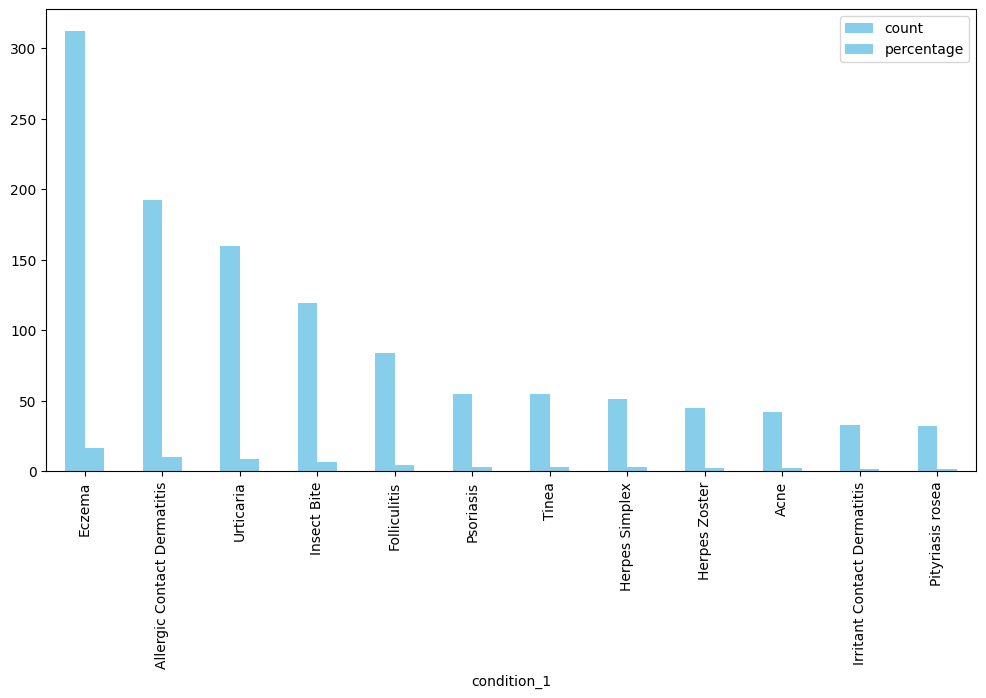

In [47]:
condition_summary[condition_summary['count']>30].plot(kind='bar', figsize=(12, 6), color='skyblue')

In [49]:
condition_summary

,count,percentage
condition_1,,
Eczema,312,16.67
Allergic Contact Dermatitis,192,10.26
Urticaria,160,8.55
Insect Bite,119,6.36
Folliculitis,84,4.49
...,...,...
unilateral laterothoracic exanthem,1,0.05
Skin lesion in drug addict,1,0.05
Vitiligo,1,0.05


In [53]:
unique_conditions.contains("Dermatitis")

AttributeError: 'numpy.ndarray' object has no attribute 'contains'

In [54]:
condition_summary.to_csv('data/condition_summary.csv')

In [1]:
#### Data Cleaning is done

In [2]:
## Loading the cleaned data

In [2]:
import pandas as pd

In [3]:
df_case = pd.read_csv('data/clean_data/cases_cleaned.csv')
df_label = pd.read_csv('data/clean_data/labels_cleaned_filtered.csv')

In [4]:
df_case.head()

,case_id,body_part,image_1_path,image_2_path,image_3_path,image_1_shot_type,image_2_shot_type,image_3_shot_type,combined_race
0,-1.000000e+18,foot_top_or_side,dataset/images/-3205742176803893704.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN
1,-1.000000e+18,NaN,dataset/images/-4762289084741430925.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN
2,-1.000000e+18,arm,dataset/images/-4027806997035329030.png,NaN,NaN,CLOSE_UP,NaN,NaN,HISPANIC_LATINO_OR_SPANISH_ORIGIN
3,-1.000000e+18,palm,dataset/images/-5332065579713135540.png,dataset/images/-6353431708064969797.png,dataset/images/742075435141960831.png,AT_DISTANCE,AT_AN_ANGLE,CLOSE_UP,NaN
4,-1.000000e+18,"head_or_neck, arm, back_of_hand, torso_front, ...",dataset/images/-3799298995660217860.png,dataset/images/-5881426422999442186.png,dataset/images/5854025080806696361.png,AT_AN_ANGLE,AT_DISTANCE,CLOSE_UP,WHITE


In [5]:
df_label.head()

,case_id,condition_1,confidence_1,avg_skin_type,skin_type_category
0,-1.000000e+18,Impetigo,0.55,4.000000,brown
1,-1.010000e+18,Basal Cell Carcinoma,0.55,3.000000,fair
2,-1.020000e+17,Eczema,0.67,3.666667,fair
3,-1.020000e+18,Purpura,1.00,4.000000,brown
4,-1.030000e+18,Eczema,0.55,2.000000,white
